In [2]:
pip install matplotlib numpy pandas openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 81.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 124.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 164.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 185.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Replace this:
# df = pd.read_csv(filename, parse_dates=['UTC'], index_col='UTC')

# WITH THIS (adjust the format string if your CSV is different):
df = pd.read_csv(
    filename,
    parse_dates=['UTC'],
    index_col='UTC',
    date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S')
)

print(df.index)
print(df.head())


NameError: name 'filename' is not defined

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- CONFIGURATION ---
beaches = ['Maroubra', 'Narrabeen-Mid', 'Tamarama',] # Add other beaches as needed, e.g. 'Narrabeen-Mid', etc.
contours = ['10', '30']
plot_start = pd.to_datetime('2019-05-30')
plot_end = pd.to_datetime('2019-06-27')
storm_start = pd.to_datetime('2019-06-04')
storm_end = pd.to_datetime('2019-06-07')

def load_wave_data(beach, contour):
    fname = f'WaveTimeSeries_{beach}_30May-27Jun2019_{contour}-metre-contour.csv'
    df = pd.read_csv(fname, parse_dates=['UTC'], index_col='UTC')
    
    # Standardize column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    
    # Filter to just the plot window
    df = df[(df.index >= plot_start) & (df.index <= plot_end)]

    return df
    
    data = {}
    for beach in beaches:
        data[beach] = {}
    for contour in contours:
        try:

            data[beach][contour] = load_wave_data(beach, contour)
        except Exception as e:
            print(f'Error loading {beach} {contour}m: {e}')
    
    for beach in beaches:
        if not all(contour in data[beach] and data[beach][contour] is not None for contour in contours):
            continue
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharex=True, constrained_layout=True)
    
    # --- Wave Height ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        label = f'{contour}m'
    data[beach][contour]['significant_wave_height'].plot(
    ax=axes[0], label=label, color=color, linewidth=2)
    axes[0].set_ylabel('Significant wave height (m)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[0].set_title(f'{beach} significant wave height (10m vs 30m contour)', fontsize=14, pad=10)
    
    # --- Wave Period ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        label = f'{contour}m'
    data[beach][contour]['peak_wave_period'].plot(
    ax=axes[1], label=label, color=color, linewidth=2)
    axes[1].set_ylabel('Significant wave period (s)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[1].set_title(f'{beach} significant wave period (10m vs 30m contour)' , fontsize=14, pad=10)
    
    # --- Figure Title ---
    fig.suptitle(f'', fontsize=16, y=1.03)
    
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- CONFIGURATION ---
beaches = ['Maroubra', 'Narrabeen-Mid', 'Tamarama']  # Add other beaches as needed
contours = ['10', '30']
plot_start = pd.to_datetime('2019-05-30')
plot_end = pd.to_datetime('2019-06-27')
storm_start = pd.to_datetime('2019-06-04')
storm_end = pd.to_datetime('2019-06-07')

def load_wave_data(beach, contour):
    fname = f'WaveTimeSeries_{beach}_30May-27Jun2019_{contour}-metre-contour.csv'
    df = pd.read_csv(fname, parse_dates=['UTC'], index_col='UTC')
    # Standardize column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    # Filter to just the plot window
    df = df[(df.index >= plot_start) & (df.index <= plot_end)]
    return df

# --- DATA LOADING ---
data = {}
for beach in beaches:
    data[beach] = {}
    for contour in contours:
        try:
            data[beach][contour] = load_wave_data(beach, contour)
        except Exception as e:
            print(f'Error loading {beach} {contour}m: {e}')

# --- PLOTTING ---
for beach in beaches:
    if not all(contour in data[beach] and data[beach][contour] is not None for contour in contours):
        continue

    fig, axes = plt.subplots(2, 1, figsize=(15, 6), sharex=True, constrained_layout=True)

    # --- Wave Height ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        label = f'{contour}m'
        data[beach][contour]['significant_wave_height'].plot(
            ax=axes[0], label=label, color=color, linewidth=2)
    axes[0].set_ylabel('Significant wave height (m)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[1].set_title(f'{beach} significant wave height (10m vs 30m contour)' , fontsize=14, pad=10)
                  
    # --- Wave Period ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        label = f'{contour}m'
        data[beach][contour]['peak_wave_period'].plot(
            ax=axes[1], label=label, color=color, linewidth=2)
    axes[1].set_ylabel('Significant wave period (s)')
    axes[1].set_title(f'{beach} significant wave period (10m vs 30m contour)' , fontsize=14, pad=10)
    
    

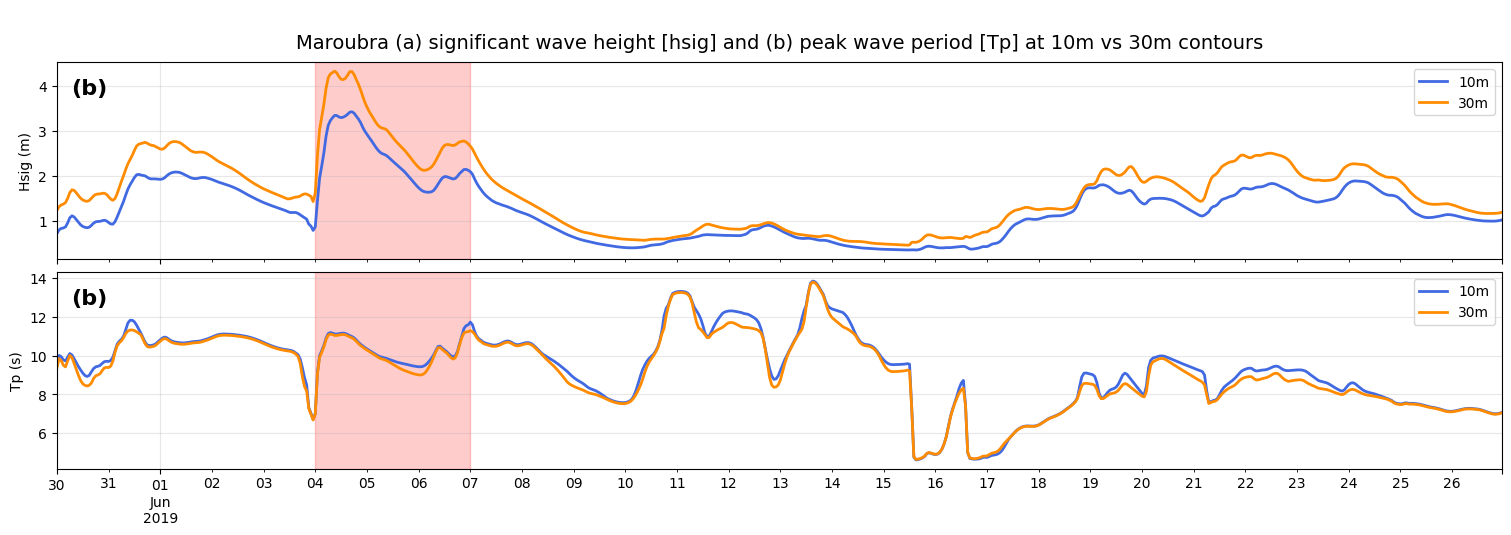

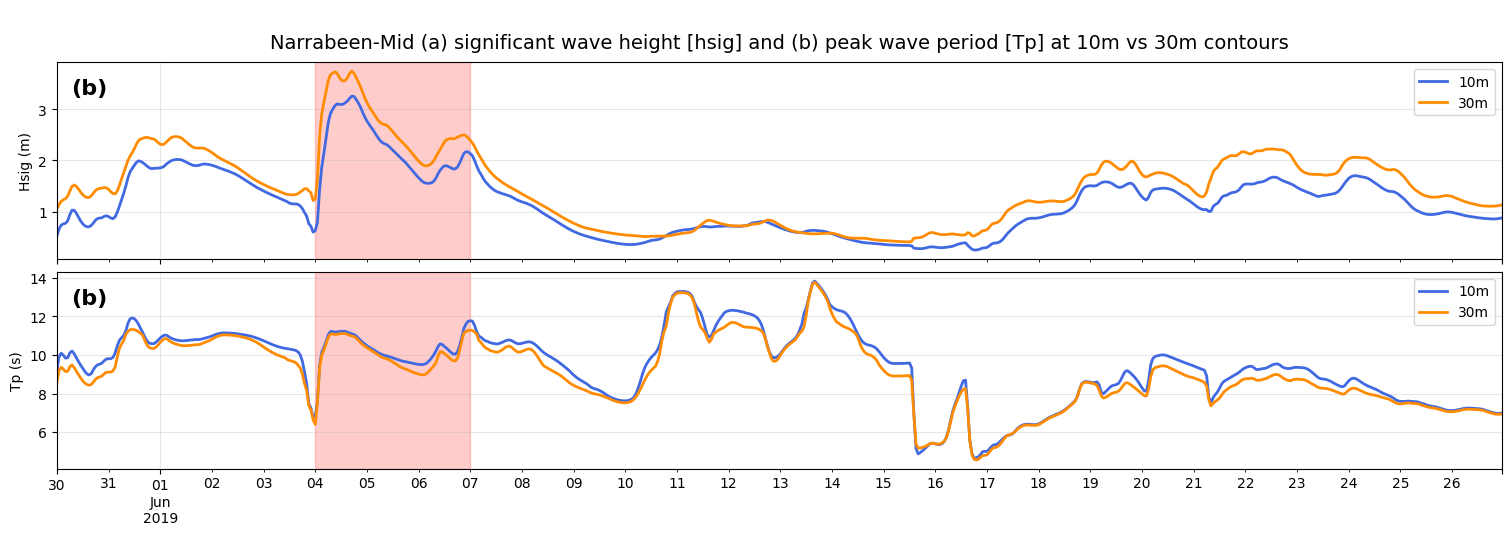

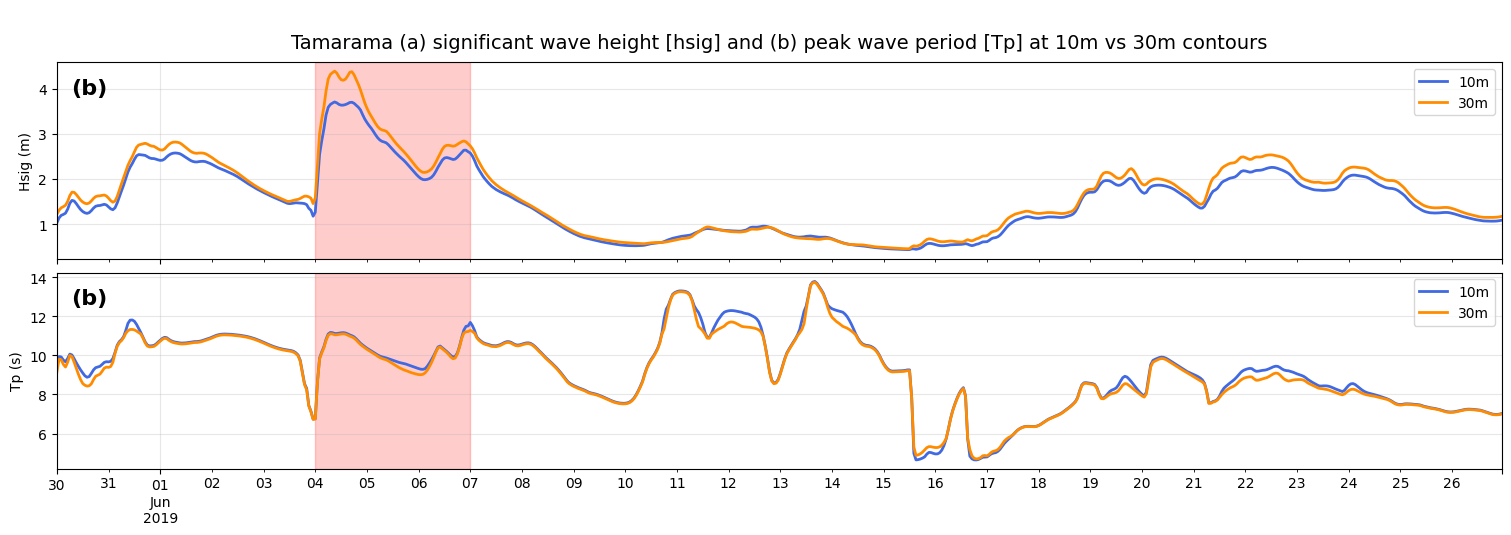

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- CONFIGURATION ---
beaches = ['Maroubra', 'Narrabeen-Mid', 'Tamarama']
contours = ['10', '30']
plot_start = pd.to_datetime('2019-05-30')
plot_end = pd.to_datetime('2019-06-27')
storm_start = pd.to_datetime('2019-06-04')
storm_end = pd.to_datetime('2019-06-07')

def load_wave_data(beach, contour):
    fname = f'WaveTimeSeries_{beach}_30May-27Jun2019_{contour}-metre-contour.csv'
    df = pd.read_csv(fname, parse_dates=['UTC'], index_col='UTC')
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    df = df[(df.index >= plot_start) & (df.index <= plot_end)]
    return df

# --- DATA LOADING ---
data = {}
for beach in beaches:
    data[beach] = {}
    for contour in contours:
        try:
            data[beach][contour] = load_wave_data(beach, contour)
        except Exception as e:
            print(f'Error loading {beach} {contour}m: {e}')

panel_labels = ['a', 'b']


# --- PLOTTING ---
for beach in beaches:
    if not all(contour in data[beach] and data[beach][contour] is not None for contour in contours):
        continue

    fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharex=True, constrained_layout=True)

    # --- Wave Height ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        label = f'{contour}m'
        data[beach][contour]['significant_wave_height'].plot(
            ax=axes[0], label=label, color=color, linewidth=2)
    axes[0].set_ylabel('Hsig (m)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    # Panel label and title
    axes[0].text(0.01, 0.92, f'({panel_labels[1]})', transform=axes[0].transAxes, fontsize=16, fontweight='bold', va='top')
    axes[0].set_title(f'{beach} (a) significant wave height [hsig] and (b) peak wave period [Tp] at 10m vs 30m contours', fontsize=14, pad=10)

    # --- Wave Period ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        label = f'{contour}m'
        data[beach][contour]['peak_wave_period'].plot(
            ax=axes[1], label=label, color=color, linewidth=2)
    axes[1].set_ylabel('Tp (s)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[1].text(0.01, 0.92, f'({panel_labels[1]})', transform=axes[1].transAxes, fontsize=16, fontweight='bold', va='top')
    axes[1].set_xlabel('')  # Remove 'UTC' label

    # --- Figure Title ---
    fig.suptitle(f' ', fontsize=16, y=1.04)
    plt.show()


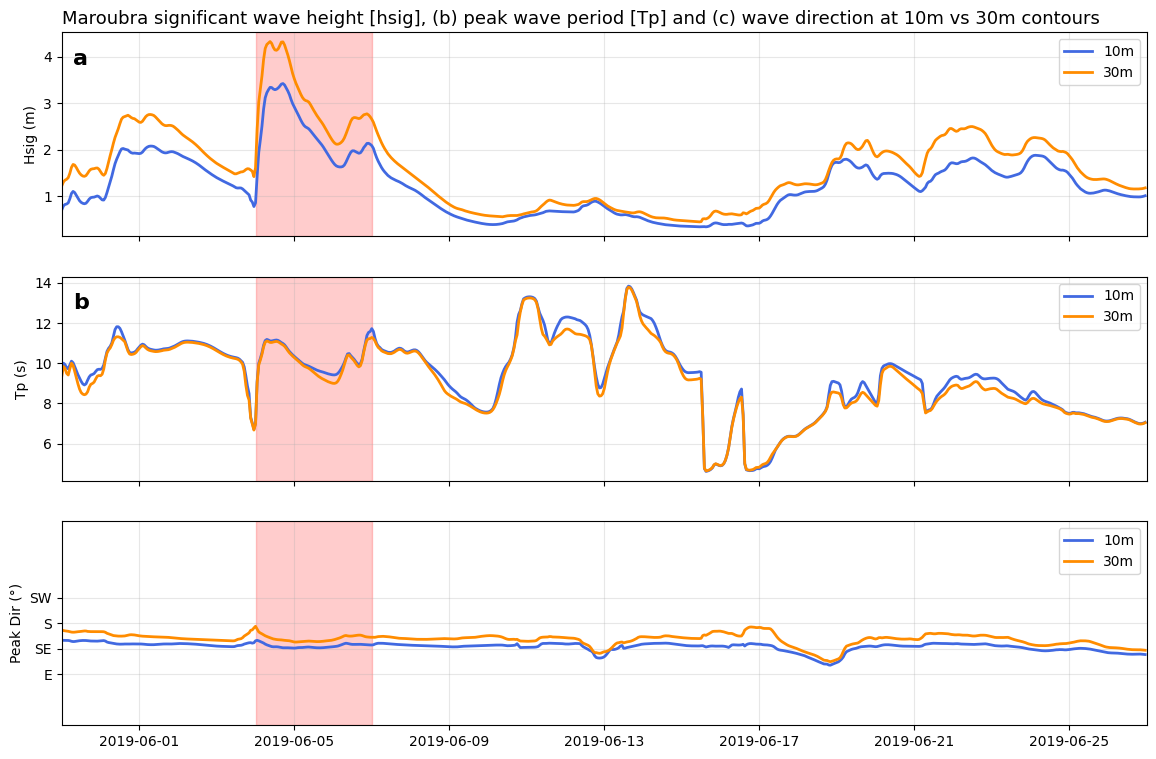

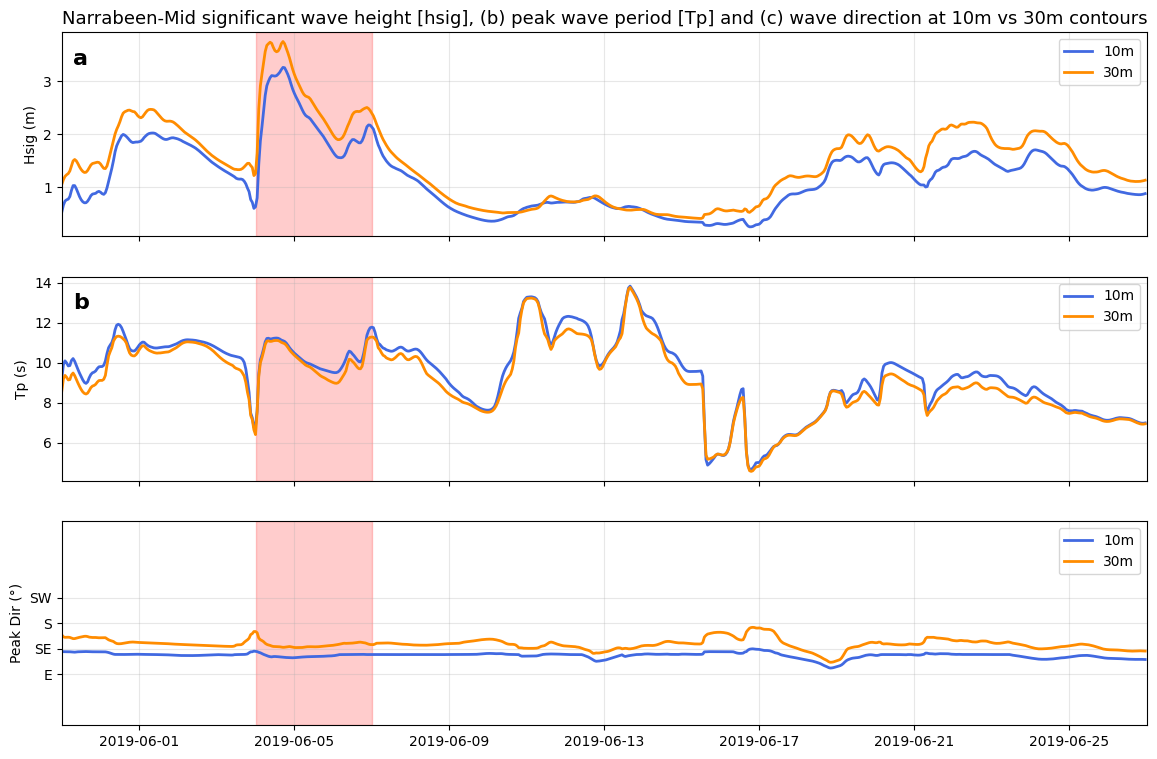

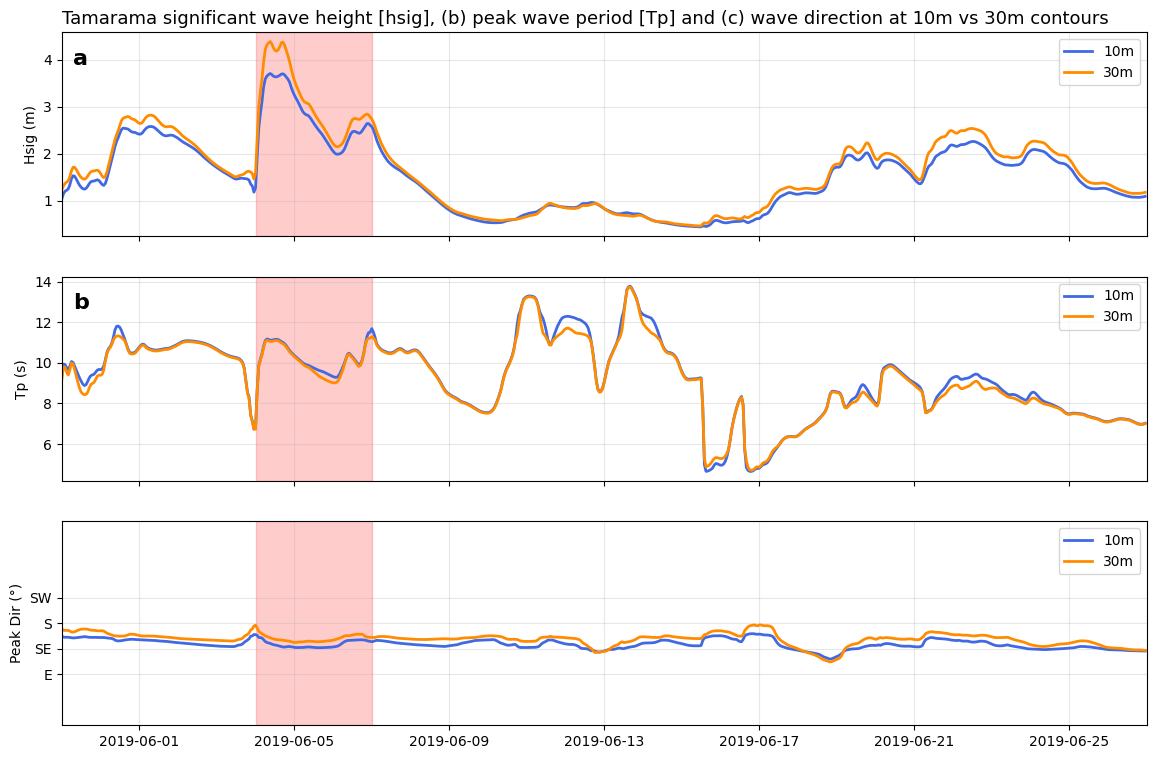

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- CONFIGURATION ---
beaches = ['Maroubra', 'Narrabeen-Mid', 'Tamarama']
contours = ['10', '30']
plot_start = pd.to_datetime('2019-05-30')
plot_end = pd.to_datetime('2019-06-27')
storm_start = pd.to_datetime('2019-06-04')
storm_end = pd.to_datetime('2019-06-07')

def load_wave_data(beach, contour):
    fname = f'WaveTimeSeries_{beach}_30May-27Jun2019_{contour}-metre-contour.csv'
    df = pd.read_csv(fname, parse_dates=['UTC'], index_col='UTC')
    df = df[(df.index >= plot_start) & (df.index <= plot_end)]
    return df

# --- DATA LOADING ---
data = {}
for beach in beaches:
    data[beach] = {}
    for contour in contours:
        try:
            data[beach][contour] = load_wave_data(beach, contour)
        except Exception as e:
            print(f'Error loading {beach} {contour}m: {e}')

panel_labels = ['a', 'b', 'c']

# --- PLOTTING ---
for beach in beaches:
    if not all(contour in data[beach] and not data[beach][contour].empty for contour in contours):
        continue

    fig, axes = plt.subplots(3, 1, figsize=(14, 9), sharex=True)

    # 1. Wave Height
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        df = data[beach][contour]
        axes[0].plot(df.index, df['Significant Wave Height'], label=f'{contour}m', color=color, linewidth=2)
    axes[0].set_ylabel('Hsig (m)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[0].set_title(f'{beach} significant wave height [hsig], (b) peak wave period [Tp] and (c) wave direction at 10m vs 30m contours', loc='left', fontsize=13)
    axes[0].text(0.01, 0.92, f'{panel_labels[0]}', transform=axes[0].transAxes, fontsize=16, fontweight='bold', va='top')
    axes[0].set_xlim(plot_start, plot_end)

    # 2. Wave Period
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        df = data[beach][contour]
        axes[1].plot(df.index, df['Peak Wave Period'], label=f'{contour}m', color=color, linewidth=2)
    axes[1].set_ylabel('Tp (s)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[1].text(0.01, 0.92, f'{panel_labels[1]}', transform=axes[1].transAxes, fontsize=16, fontweight='bold', va='top')
    axes[1].set_xlim(plot_start, plot_end)

    # 3. Wave Direction
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        df = data[beach][contour]
        axes[2].plot(df.index, df['Peak Wave Direction'], label=f'{contour}m', color=color, linewidth=2)
    axes[2].set_ylabel('Peak Dir (°)')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    axes[2].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[1].text(0.01, 0.92, f'({panel_labels[2]})', transform=axes[2].transAxes, fontsize=16, fontweight='bold', va='top')
    axes[2].set_ylim(0, 360)
    axes[2].set_yticks([90, 135, 180, 225])
    axes[2].set_yticklabels(['E', 'SE', 'S', 'SW'])


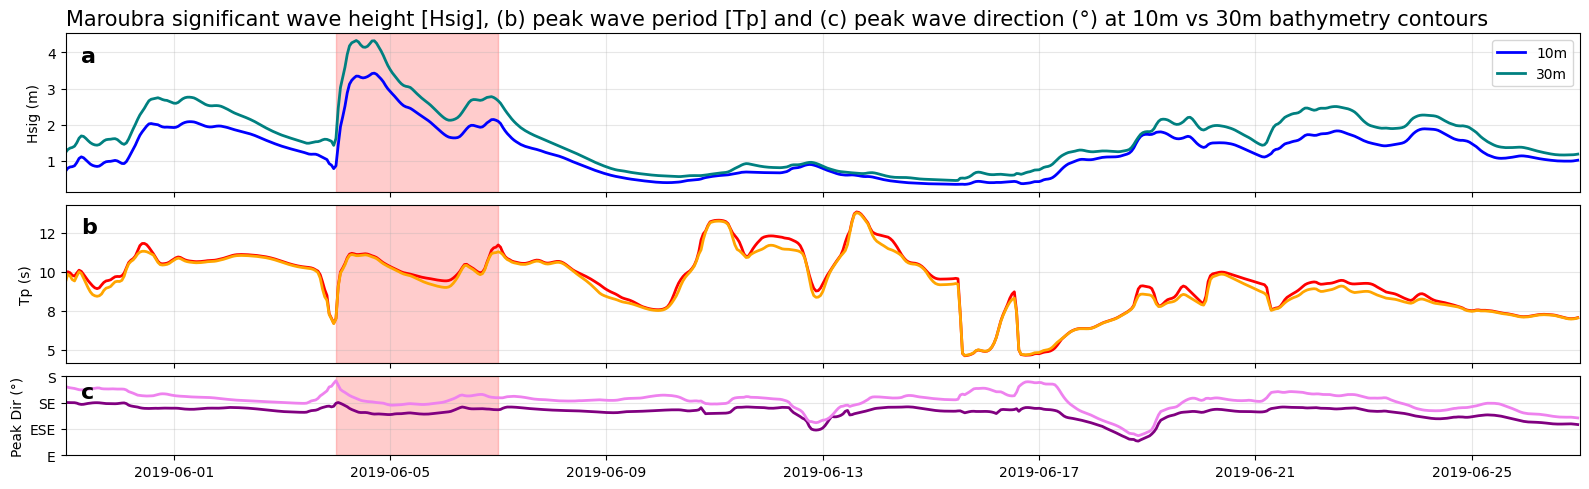

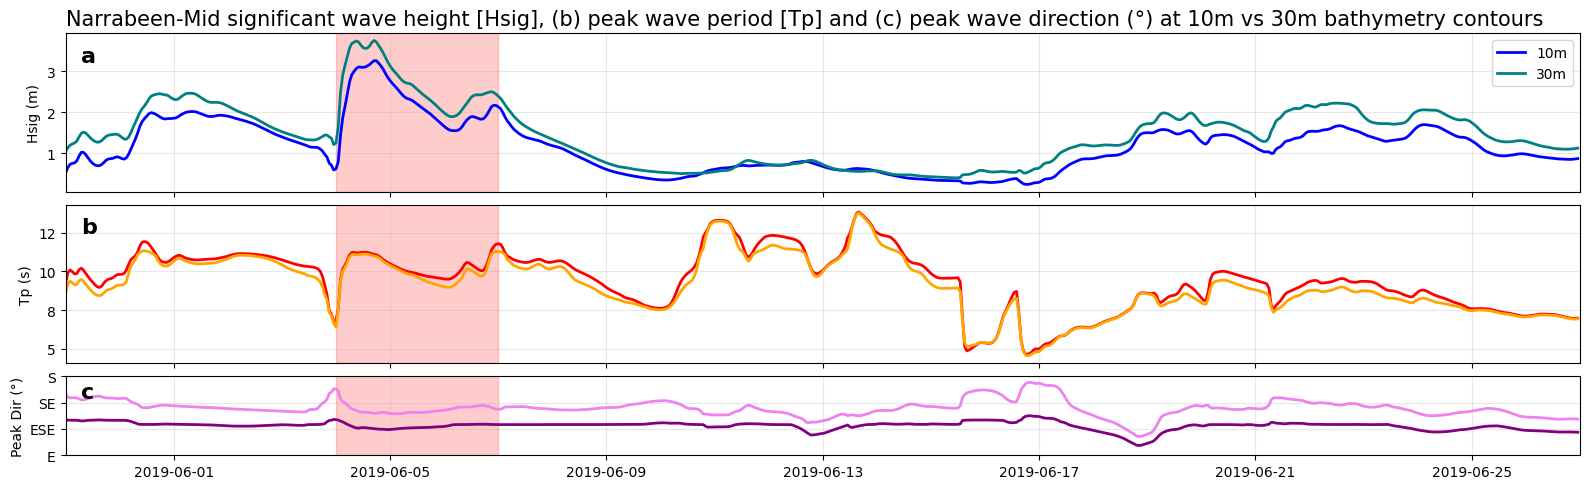

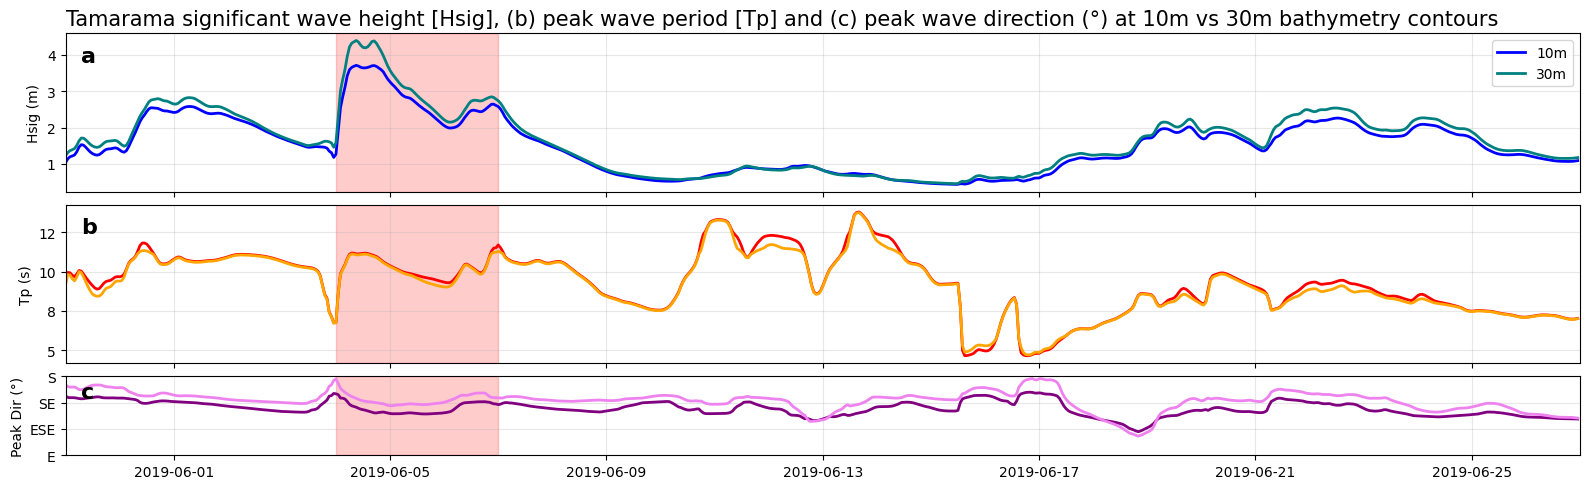

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- CONFIGURATION ---
beaches = ['Maroubra', 'Narrabeen-Mid', 'Tamarama']
contours = ['10', '30']
plot_start = pd.to_datetime('2019-05-30')
plot_end = pd.to_datetime('2019-06-27')
storm_start = pd.to_datetime('2019-06-04')
storm_end = pd.to_datetime('2019-06-07')

def load_wave_data(beach, contour):
    fname = f'WaveTimeSeries_{beach}_30May-27Jun2019_{contour}-metre-contour.csv'
    df = pd.read_csv(fname, parse_dates=['UTC'], index_col='UTC')
    df = df[(df.index >= plot_start) & (df.index <= plot_end)]
    return df

# --- DATA LOADING ---
data = {}
for beach in beaches:
    data[beach] = {}
    for contour in contours:
        try:
            data[beach][contour] = load_wave_data(beach, contour)
        except Exception as e:
            print(f'Error loading {beach} {contour}m: {e}')

panel_labels = ['a', 'b', 'c']

# --- PLOTTING ---
for beach in beaches:
    if not all(contour in data[beach] and not data[beach][contour].empty for contour in contours):
        continue

    # Make direction panel half as tall as the others
    fig, axes = plt.subplots(
        3, 1, figsize=(16, 5), sharex=True,
        gridspec_kw={'height_ratios': [1, 1, 0.5]}
    )

    # 1. Wave Height
    for contour, color in zip(contours, ['blue', 'teal']):
        df = data[beach][contour]
        axes[0].plot(df.index, df['Significant Wave Height'], label=f'{contour}m', color=color, linewidth=2)
    axes[0].set_ylabel('Hsig (m)')
    axes[0].legend(loc='upper right')
    axes[0].grid(True, alpha=0.3)
    axes[0].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[0].set_title(f'{beach} significant wave height [Hsig], (b) peak wave period [Tp] and (c) peak wave direction (°) at 10m vs 30m bathymetry contours', loc='left', fontsize=15)
    axes[0].set_xlim(plot_start, plot_end)
    axes[0].text(0.01, 0.92, f'{panel_labels[0]}', transform=axes[0].transAxes, fontsize=16, fontweight='bold', va='top')

    # 2. Wave Period
    for contour, color in zip(contours, ['red', 'orange']):
        df = data[beach][contour]
        axes[1].plot(df.index, df['Peak Wave Period'], label=f'{contour}m', color=color, linewidth=2)
    axes[1].set_ylabel('Tp (s)')
    axes[0].legend(loc='upper right')
    axes[1].grid(True, alpha=0.3)
    axes[1].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[1].set_xlim(plot_start, plot_end)
    axes[1].text(0.01, 0.92, f'{panel_labels[1]}', transform=axes[1].transAxes, fontsize=16, fontweight='bold', va='top')
    
    # Set y-axis to integer (no decimals)
    import matplotlib.ticker as ticker
    axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
    
    # 3. Wave Direction
    for contour, color in zip(contours, ['purple', 'violet']):
        df = data[beach][contour]
        axes[2].plot(df.index, df['Peak Wave Direction'], label=f'{contour}m', color=color, linewidth=2)
    axes[2].set_ylabel('Peak Dir (°)')
    axes[2].grid(True, alpha=0.3)
    axes[2].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[2].set_ylim(90, 180)  # E (bottom) to S (top)
    axes[2].set_yticks([90, 120, 150, 180])
    axes[2].set_yticklabels(['E', 'ESE', 'SE', 'S'])
    axes[0].legend(loc='upper right')
    axes[2].text(0.01, 0.92, f'{panel_labels[2]}', transform=axes[2].transAxes, fontsize=16, fontweight='bold', va='top')
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.1)  # Reduce space between panels
    plt.show()


In [61]:
print(data['Narrabeen-Mid']['10'].index[-1])
print(data['Narrabeen-Mid']['30'].index[-1])
print(data['Maroubra']['10'].index[-1])
print(data['Tamarama']['10'].index[-1])


2019-06-27 00:00:00
2019-06-27 00:00:00
2019-06-27 00:00:00
2019-06-27 00:00:00


Narrabeen-Mid 10m last row:
                      Significant Wave Height  Peak Wave Period  \
UTC                                                              
2019-06-26 19:00:00                 0.855619          7.012699   
2019-06-26 20:00:00                 0.856358          6.985097   
2019-06-26 21:00:00                 0.860428          6.973058   
2019-06-26 22:00:00                 0.866817          6.973297   
2019-06-26 23:00:00                 0.875804          6.987464   

                     Peak Wave Direction  Significant Sea Height  \
UTC                                                                
2019-06-26 19:00:00           116.551394                0.671767   
2019-06-26 20:00:00           116.507608                0.667058   
2019-06-26 21:00:00           116.418545                0.662759   
2019-06-26 22:00:00           116.300642                0.660182   
2019-06-26 23:00:00           116.172868                0.660313   

                     Peak Sea P

/tmp/ipykernel_170/3780941262.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Narrabeen-Mid'][contour] = data['Narrabeen-Mid'][contour].fillna(method='ffill')


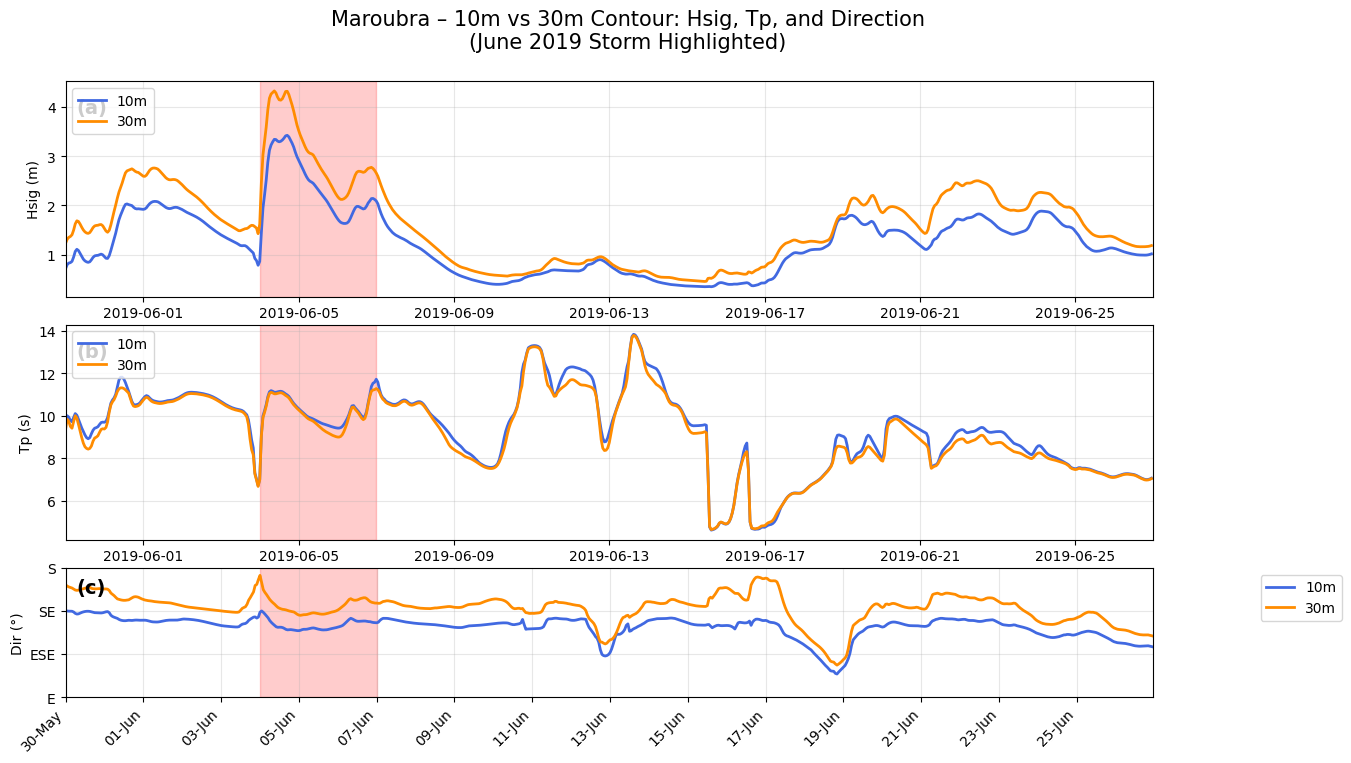

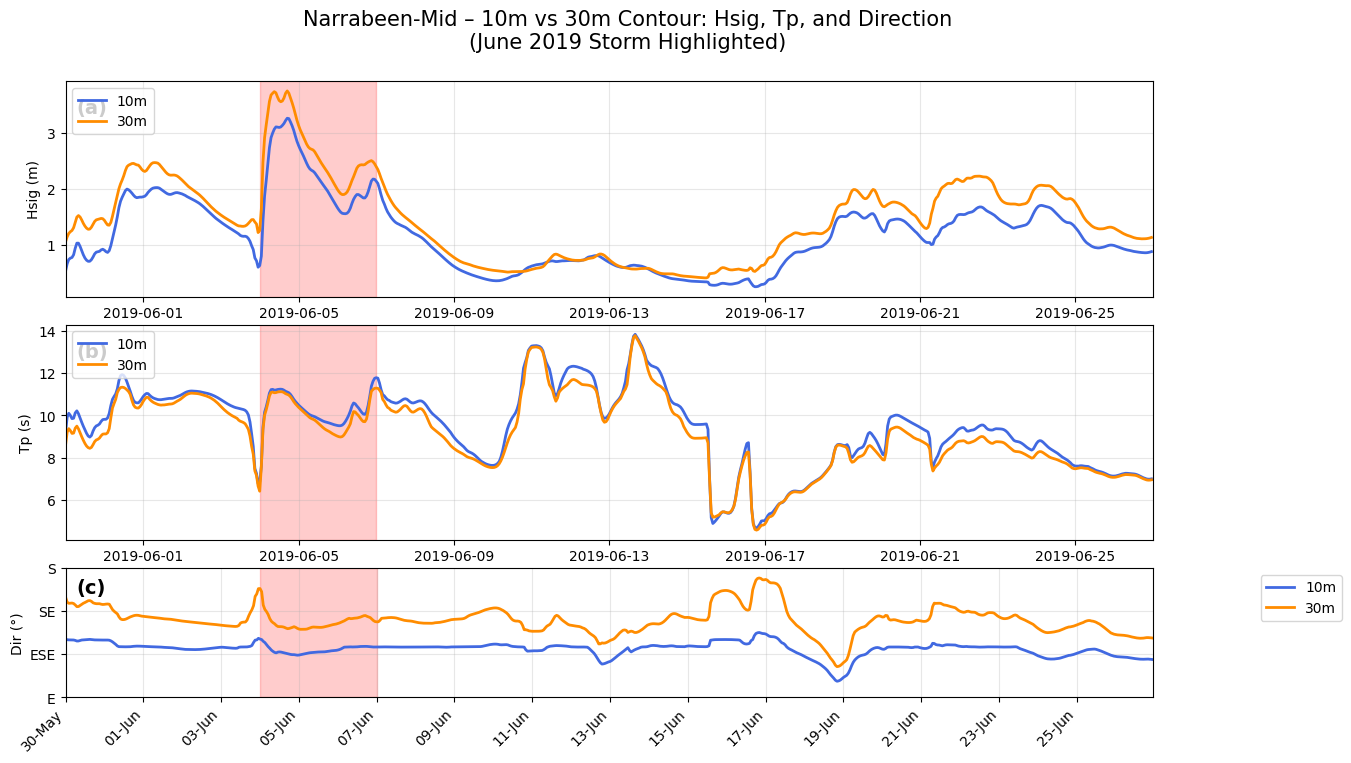

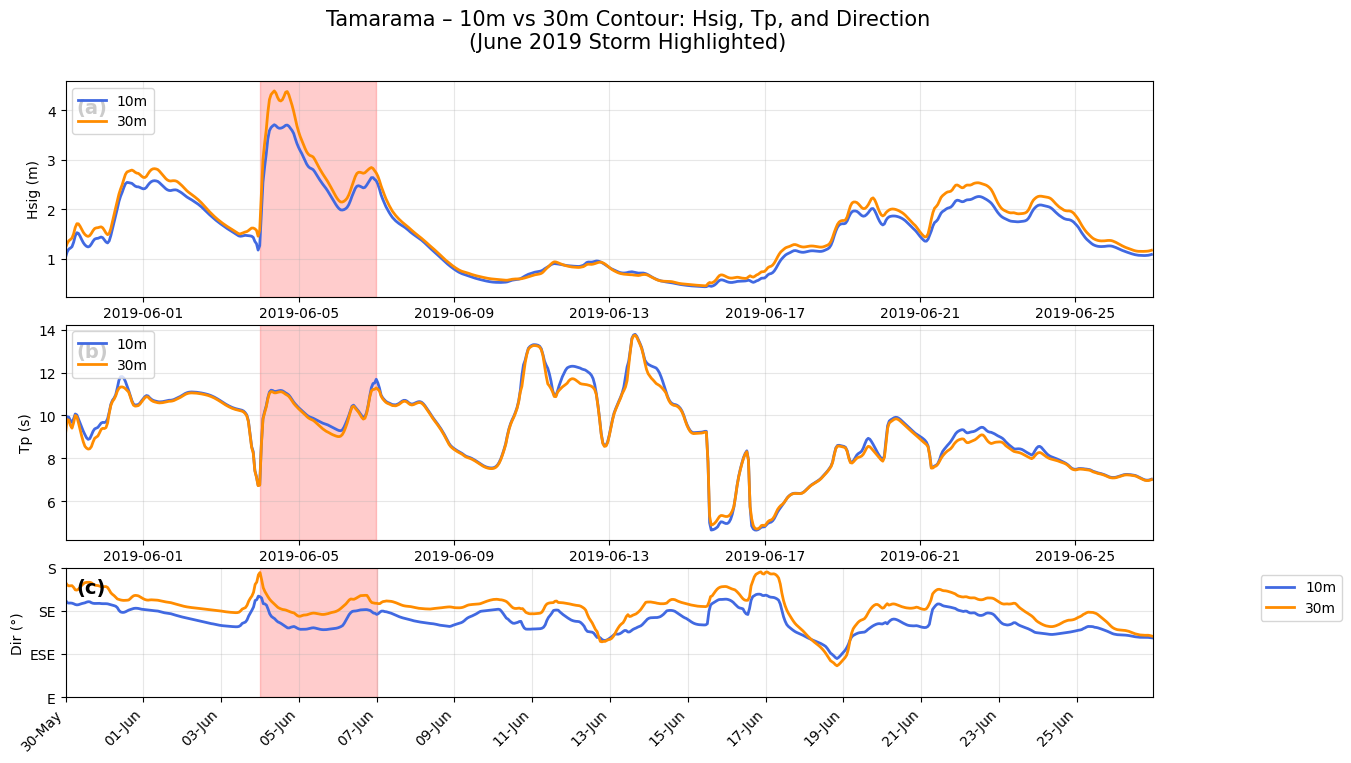

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- CONFIGURATION ---
beaches = ['Maroubra', 'Narrabeen-Mid', 'Tamarama']
contours = ['10', '30']
plot_start = pd.to_datetime('2019-05-30')
plot_end = pd.to_datetime('2019-06-27')
storm_start = pd.to_datetime('2019-06-04')
storm_end = pd.to_datetime('2019-06-07')

def load_wave_data(beach, contour):
    fname = f'WaveTimeSeries_{beach}_30May-27Jun2019_{contour}-metre-contour.csv'
    df = pd.read_csv(fname, parse_dates=['UTC'], index_col='UTC')
    df = df[(df.index >= plot_start) & (df.index <= plot_end)]
    return df

# --- DATA LOADING ---
data = {}
for beach in beaches:
    data[beach] = {}
    for contour in contours:
        try:
            data[beach][contour] = load_wave_data(beach, contour)
        except Exception as e:
            print(f'Error loading {beach} {contour}m: {e}')

panel_labels = ['a', 'b', 'c']

print("Narrabeen-Mid 10m last row:\n", data['Narrabeen-Mid']['10'].tail())
print("Narrabeen-Mid 30m last row:\n", data['Narrabeen-Mid']['30'].tail())
for contour in contours:
    data['Narrabeen-Mid'][contour] = data['Narrabeen-Mid'][contour].fillna(method='ffill')

# --- PLOTTING ---
for beach in beaches:
    if not all(contour in data[beach] and not data[beach][contour].empty for contour in contours):
        continue

    # Create 3 panels without shared x-axis for direction
    fig, axes = plt.subplots(3, 1, figsize=(15, 8), 
                            gridspec_kw={'height_ratios': [1, 1, 0.6], 'hspace': 0.15})

    # --- Wave Height (always full width) ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        df = data[beach][contour]
        axes[0].plot(df.index, df['Significant Wave Height'], 
                    label=f'{contour}m', color=color, linewidth=2)
    axes[0].set_ylabel('Hsig (m)')
    axes[0].legend(loc='upper left')
    axes[0].grid(True, alpha=0.3)
    axes[0].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[0].set_xlim(plot_start, plot_end)  # Force full width
    axes[0].text(0.01, 0.92, f'({panel_labels[0]})', transform=axes[0].transAxes, 
                fontsize=14, fontweight='bold', va='top')

    # --- Wave Period (always full width) ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        df = data[beach][contour]
        axes[1].plot(df.index, df['Peak Wave Period'], 
                    label=f'{contour}m', color=color, linewidth=2)
    axes[1].set_ylabel('Tp (s)')
    axes[1].legend(loc='upper left')
    axes[1].grid(True, alpha=0.3)
    axes[1].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[1].set_xlim(plot_start, plot_end)  # Force full width
    axes[1].text(0.01, 0.92, f'({panel_labels[1]})', transform=axes[1].transAxes, 
                fontsize=14, fontweight='bold', va='top')

    # --- Wave Direction (variable width) ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        df = data[beach][contour]
        axes[2].plot(df.index, df['Peak Wave Direction'], 
                    label=f'{contour}m', color=color, linewidth=2)
    
    # Set direction-specific limits
    dir_data_start = data[beach][contours[0]].index[0]
    dir_data_end = data[beach][contours[0]].index[-1]
    axes[2].set_xlim(dir_data_start, dir_data_end)  # Follow actual data
    
    axes[2].set_ylabel('Dir (°)')
    axes[2].legend(loc='upper right', bbox_to_anchor=(1.18, 1))  # Right-aligned legend
    axes[2].grid(True, alpha=0.3)
    axes[2].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[2].set_ylim(90, 180)
    axes[2].set_yticks([90, 120, 150, 180])
    axes[2].set_yticklabels(['E', 'ESE', 'SE', 'S'])
    axes[2].text(0.01, 0.92, f'({panel_labels[2]})', transform=axes[2].transAxes, 
                fontsize=14, fontweight='bold', va='top')

    # --- Formatting ---
    axes[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
    axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    plt.setp(axes[2].get_xticklabels(), rotation=45, ha='right')
    
    # Make space for direction legend
    plt.subplots_adjust(right=0.85)
    
    plt.suptitle(f'{beach} – 10m vs 30m Contour: Hsig, Tp, and Direction\n(June 2019 Storm Highlighted)', 
                fontsize=15, y=0.97)
    plt.show()
